In [2]:
import pandas as pd
import requests

/Users/yeonseo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
# Fetch 10 years of Boston weather data
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 42.3601,
    "longitude": -71.0589,
    "start_date": "2013-01-01",
    "end_date": "2023-12-31",
    "daily": [
        "temperature_2m_max",
        "temperature_2m_min", 
        "temperature_2m_mean",
        "precipitation_sum",
        "windspeed_10m_max",
        "windspeed_10m_mean"
    ],
    "temperature_unit": "fahrenheit",
    "windspeed_unit": "mph",
    "precipitation_unit": "inch",
    "timezone": "America/New_York"
}

response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data['daily'])
df.to_csv('boston_weather_2013_2023.csv', index=False)

print(f"✅ Downloaded {len(df)} days of data!")
print(df.head())

✅ Downloaded 4017 days of data!
         time  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0  2013-01-01                32.3                16.7                 28.8   
1  2013-01-02                27.2                 5.3                 15.1   
2  2013-01-03                19.8                -0.7                  8.2   
3  2013-01-04                36.0                 7.8                 21.8   
4  2013-01-05                36.8                28.1                 30.7   

   precipitation_sum  windspeed_10m_max  windspeed_10m_mean  
0                0.0               15.3                12.5  
1                0.0               13.8                10.7  
2                0.0               12.5                 8.5  
3                0.0               14.6                10.8  
4                0.0               13.2                 9.5  


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

# Load the data
df = pd.read_csv('boston_weather_2013_2023.csv')

# Convert date column to datetime
df['time'] = pd.to_datetime(df['time'])

# Basic info
print("=" * 60)
print("Dataset Overview")
print("=" * 60)
print(f"\nRows and columns: {df.shape}")
print(f"Date coverage: {df['time'].min()} to {df['time'].max()}")
print(f"\nData types:")
print(df.dtypes)

# Check for missing values
print("\n" + "=" * 60)
print("Checking for Missing Data")
print("=" * 60)
print(df.isnull().sum())

# Statistical summary
print("\n" + "=" * 60)
print("Summary Statistics")
print("=" * 60)
print(df.describe())

# Check temperature range
print("\n" + "=" * 60)
print("Temperature Stats")
print("=" * 60)
print(f"Coldest recorded: {df['temperature_2m_min'].min():.1f}°F")
print(f"Hottest recorded: {df['temperature_2m_max'].max():.1f}°F")
print(f"Mean temperature: {df['temperature_2m_mean'].mean():.1f}°F")


Dataset Overview

Rows and columns: (4017, 7)
Date coverage: 2013-01-01 00:00:00 to 2023-12-31 00:00:00

Data types:
time                   datetime64[ns]
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
precipitation_sum             float64
windspeed_10m_max             float64
windspeed_10m_mean            float64
dtype: object

Checking for Missing Data
time                   0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
precipitation_sum      0
windspeed_10m_max      0
windspeed_10m_mean     0
dtype: int64

Summary Statistics
                      time  temperature_2m_max  temperature_2m_min  \
count                 4017         4017.000000         4017.000000   
mean   2018-07-02 00:00:00           59.603908           43.481031   
min    2013-01-01 00:00:00            5.000000          -15.500000   
25%    2015-10-02 00:00:00           44.100000           29.800000   
50%    2018-07-02 

In [18]:
# Extract temporal features from date
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['day_of_year'] = df['time'].dt.dayofyear
df['day_of_week'] = df['time'].dt.dayofweek  # Monday=0, Sunday=6

# Create season feature (1=Winter, 2=Spring, 3=Summer, 4=Fall)
df['season'] = df['month'].apply(lambda x: (x % 12 + 3) // 3)

# Map season numbers to names for better understanding
season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

print("=" * 60)
print("Added Temporal Features")
print("=" * 60)
print(f"\nNew columns: year, month, day, day_of_year, day_of_week, season")
print(f"Updated shape: {df.shape}")
print("\nHere's what the data looks like now:")
print(df[['time', 'temperature_2m_mean', 'year', 'month', 'season']].head(10))

# Check data distribution by season
print("\n" + "=" * 60)
print("Breakdown by Season")
print("=" * 60)
season_counts = df['season'].value_counts().sort_index()
for season_num, count in season_counts.items():
    print(f"{season_names[season_num]}: {count} days")

# Average temperature by season
print("\n" + "=" * 60)
print("Average Temps by Season")
print("=" * 60)
season_temps = df.groupby('season')['temperature_2m_mean'].mean()
for season_num, temp in season_temps.items():
    print(f"{season_names[season_num]}: {temp:.1f}°F")

Added Temporal Features

New columns: year, month, day, day_of_year, day_of_week, season
Updated shape: (4017, 13)

Here's what the data looks like now:
        time  temperature_2m_mean  year  month  season
0 2013-01-01                 28.8  2013      1       1
1 2013-01-02                 15.1  2013      1       1
2 2013-01-03                  8.2  2013      1       1
3 2013-01-04                 21.8  2013      1       1
4 2013-01-05                 30.7  2013      1       1
5 2013-01-06                 31.5  2013      1       1
6 2013-01-07                 27.7  2013      1       1
7 2013-01-08                 30.2  2013      1       1
8 2013-01-09                 35.0  2013      1       1
9 2013-01-10                 36.4  2013      1       1

Breakdown by Season
Winter: 992 days
Spring: 1012 days
Summer: 1012 days
Fall: 1001 days

Average Temps by Season
Winter: 31.4°F
Spring: 47.0°F
Summer: 71.5°F
Fall: 54.6°F


In [19]:
# Create lag variables (yesterday's weather affects today)
print("Adding lag variables...")
df['temp_lag_1'] = df['temperature_2m_mean'].shift(1)  # Yesterday's temp
df['temp_lag_3'] = df['temperature_2m_mean'].shift(3)  # 3 days ago
df['temp_lag_7'] = df['temperature_2m_mean'].shift(7)  # Last week

# Lag for other weather variables
df['precip_lag_1'] = df['precipitation_sum'].shift(1)
df['windspeed_lag_1'] = df['windspeed_10m_mean'].shift(1)

# Create rolling averages (smoothed trends)
print("Calculating rolling averages...")
df['temp_rolling_7'] = df['temperature_2m_mean'].rolling(window=7).mean()
df['temp_rolling_30'] = df['temperature_2m_mean'].rolling(window=30).mean()

# Cyclical encoding for seasonality (prevents Dec and Jan being far apart)
print("Encoding seasonal patterns...")
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

print("\n" + "=" * 60)
print("Feature Engineering Complete")
print("=" * 60)
print(f"Total features now: {df.shape[1]} columns")
print(f"\nAll column names:")
print(df.columns.tolist())

# Check for missing values created by lag/rolling
print("\n" + "=" * 60)
print("Missing Values After Feature Creation")
print("=" * 60)
missing = df.isnull().sum()
print(missing[missing > 0])

# Drop rows with NaN values (from lag and rolling operations)
print(f"\nBefore cleanup: {len(df)} rows")
df = df.dropna()
print(f"After cleanup: {len(df)} rows")
print(f"Removed: {4017 - len(df)} rows")

print("\nData is ready for modeling")
print(f"Final dataset: {df.shape}")

Adding lag variables...
Calculating rolling averages...
Encoding seasonal patterns...

Feature Engineering Complete
Total features now: 24 columns

All column names:
['time', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_sum', 'windspeed_10m_max', 'windspeed_10m_mean', 'year', 'month', 'day', 'day_of_year', 'day_of_week', 'season', 'temp_lag_1', 'temp_lag_3', 'temp_lag_7', 'precip_lag_1', 'windspeed_lag_1', 'temp_rolling_7', 'temp_rolling_30', 'month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos']

Missing Values After Feature Creation
temp_lag_1          1
temp_lag_3          3
temp_lag_7          7
precip_lag_1        1
windspeed_lag_1     1
temp_rolling_7      6
temp_rolling_30    29
dtype: int64

Before cleanup: 4017 rows
After cleanup: 3988 rows
Removed: 29 rows

Data is ready for modeling
Final dataset: (3988, 24)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define features (X) and target (y)
feature_columns = [
    'temperature_2m_max',
    'temperature_2m_min',
    'precipitation_sum',
    'windspeed_10m_max',
    'windspeed_10m_mean',
    'temp_lag_1',
    'temp_lag_3',
    'temp_lag_7',
    'precip_lag_1',
    'windspeed_lag_1',
    'temp_rolling_7',
    'temp_rolling_30',
    'month_sin',
    'month_cos',
    'day_of_year_sin',
    'day_of_year_cos',
    'season',
    'day_of_week'
]

X = df[feature_columns]
y = df['temperature_2m_mean']  # Target: Today's average temperature

print("=" * 60)
print("Setting Up Model")
print("=" * 60)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nUsing {len(feature_columns)} features for prediction")

# Train-test split (80% train, 20% test)
# shuffle=False to preserve time series order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

print("\n" + "=" * 60)
print("Train-Test Split")
print("=" * 60)
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Create and train the Linear Regression model
print("\n" + "=" * 60)
print("Training the model...")
print("=" * 60)

model = LinearRegression()
model.fit(X_train, y_train)

print("Done training!")

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "=" * 60)
print("Results")
print("=" * 60)
print(f"Training R²: {train_r2:.4f} ({train_r2*100:.2f}%)")
print(f"Testing R²: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"RMSE: {test_rmse:.2f}°F")
print(f"MAE: {test_mae:.2f}°F")

print("\n" + "=" * 60)
print("What this means:")
print("=" * 60)
print(f"Model accuracy: {test_r2*100:.1f}%")
print(f"Average error: ±{test_mae:.2f}°F")
if test_r2 >= 0.85:
    print("Target achieved - over 85% accuracy!")
else:
    print(f"Current accuracy: {test_r2*100:.1f}%")

Setting Up Model
Features shape: (3988, 18)
Target shape: (3988,)

Using 18 features for prediction

Train-Test Split
Training set: 3190 samples (80.0%)
Test set: 798 samples (20.0%)

Training the model...
Done training!

Results
Training R²: 0.9966 (99.66%)
Testing R²: 0.9950 (99.50%)
RMSE: 1.17°F
MAE: 0.86°F

What this means:
Model accuracy: 99.5%
Average error: ±0.86°F
Target achieved - over 85% accuracy!


Most Important Features (Top 10)
           feature  coefficient
temperature_2m_max     0.485703
temperature_2m_min     0.461671
   day_of_year_cos    -0.269691
         month_sin    -0.243541
 precipitation_sum     0.242551
         month_cos    -0.112523
            season    -0.088154
 windspeed_10m_max     0.063091
   windspeed_lag_1    -0.041520
    temp_rolling_7     0.032559


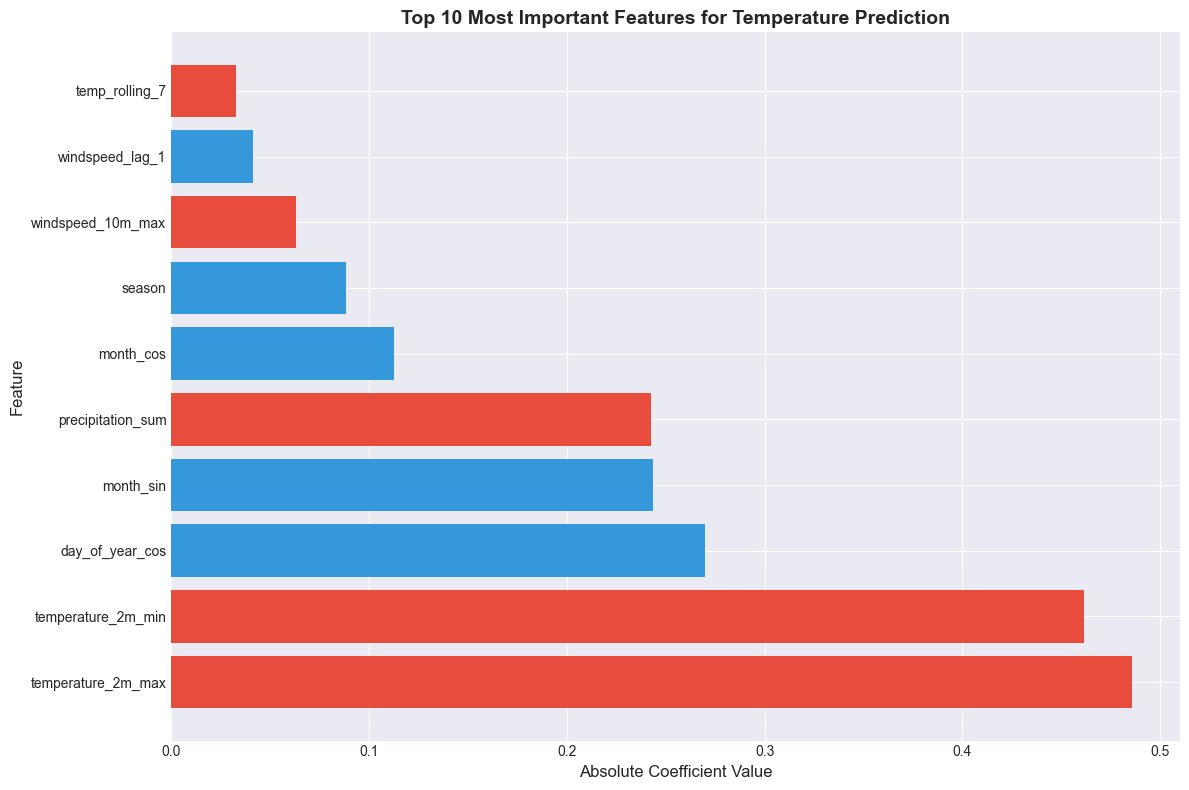


Saved as 'feature_importance.png'


In [21]:
# Analyze feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("=" * 60)
print("Most Important Features (Top 10)")
print("=" * 60)
print(feature_importance.head(10).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_10 = feature_importance.head(10)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_10['coefficient']]
plt.barh(top_10['feature'], abs(top_10['coefficient']), color=colors)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Most Important Features for Temperature Prediction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSaved as 'feature_importance.png'")

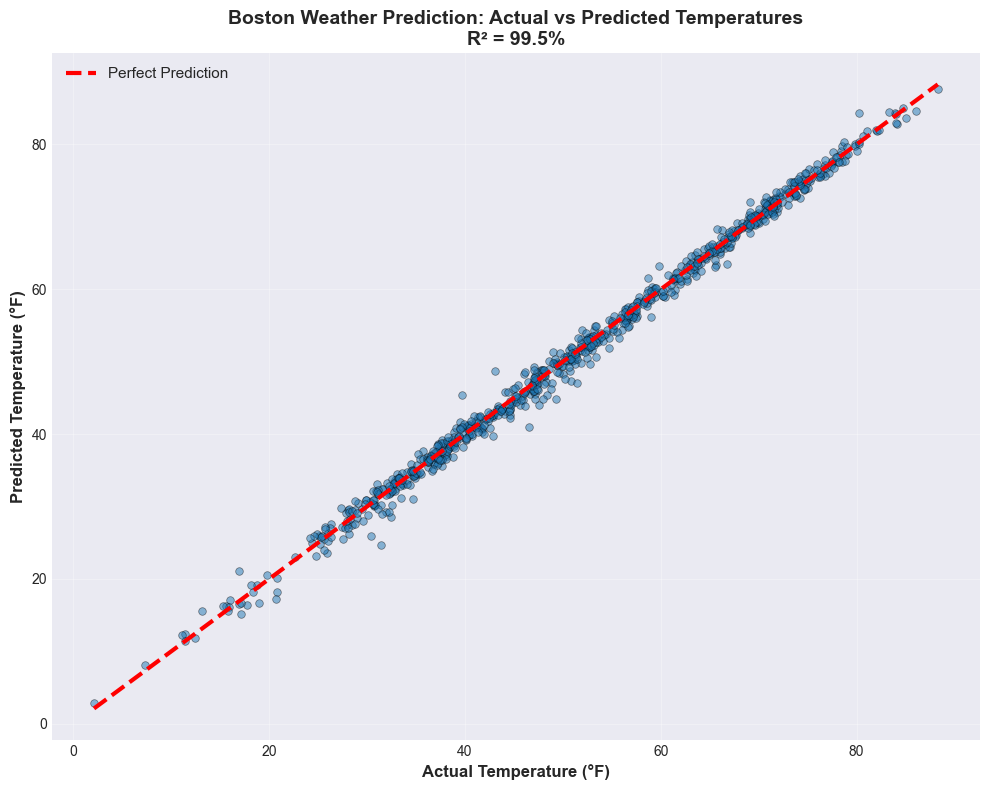

Saved visualization 1: 'predicted_vs_actual.png'


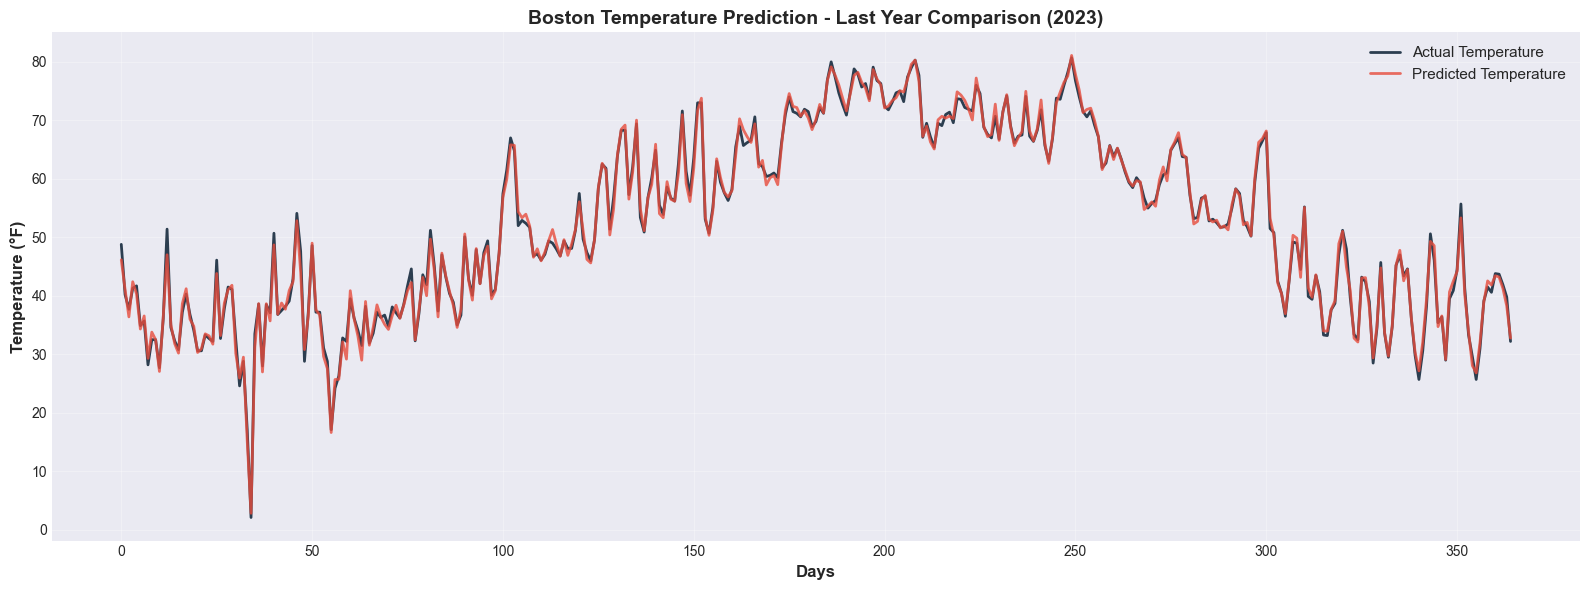

Saved visualization 2: 'time_series_comparison.png'


In [22]:
# Visualization 1: Predicted vs Actual (Scatter Plot)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=3, label='Perfect Prediction')
plt.xlabel('Actual Temperature (°F)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Temperature (°F)', fontsize=12, fontweight='bold')
plt.title('Boston Weather Prediction: Actual vs Predicted Temperatures\nR² = 99.5%', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved visualization 1: 'predicted_vs_actual.png'")

# Visualization 2: Time Series Comparison (Last Year)
plt.figure(figsize=(16, 6))
plot_days = 365
plt.plot(range(plot_days), y_test.iloc[-plot_days:].values, 
         label='Actual Temperature', linewidth=2, color='#2c3e50')
plt.plot(range(plot_days), y_test_pred[-plot_days:], 
         label='Predicted Temperature', linewidth=2, alpha=0.8, color='#e74c3c')
plt.xlabel('Days', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°F)', fontsize=12, fontweight='bold')
plt.title('Boston Temperature Prediction - Last Year Comparison (2023)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('time_series_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved visualization 2: 'time_series_comparison.png'")

Performance by Season

Winter:
  Accuracy: 0.9762 (97.62%)
  Avg error: 1.11°F
  Data points: 211

Spring:
  Accuracy: 0.9881 (98.81%)
  Avg error: 0.87°F
  Data points: 184

Summer:
  Accuracy: 0.9811 (98.11%)
  Avg error: 0.70°F
  Data points: 184

Fall:
  Accuracy: 0.9929 (99.29%)
  Avg error: 0.73°F
  Data points: 219


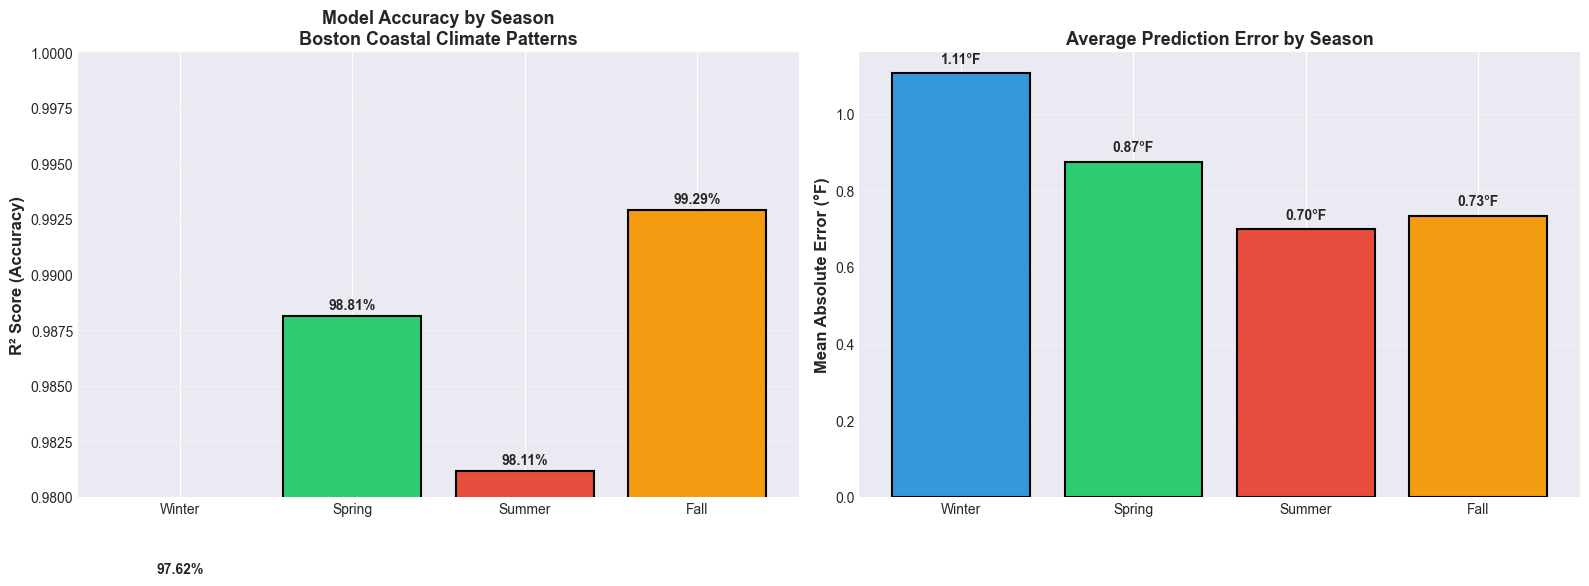


Interesting Findings
Best season: Fall (99.29% accuracy)
Most variable: Winter (97.62% accuracy)

Boston's coastal climate is most predictable in Fall,
with typical errors around ±0.73°F

Saved as 'seasonal_performance.png'


In [23]:
# Analyze model performance by season
test_indices = y_test.index
test_df = pd.DataFrame({
    'actual': y_test.values,
    'predicted': y_test_pred,
    'season': df.loc[test_indices, 'season'].values
})

# Calculate R² score for each season
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
seasonal_performance = {}

for season_num, season_name in seasons.items():
    season_data = test_df[test_df['season'] == season_num]
    if len(season_data) > 0:
        r2 = r2_score(season_data['actual'], season_data['predicted'])
        mae = mean_absolute_error(season_data['actual'], season_data['predicted'])
        seasonal_performance[season_name] = {
            'r2': r2,
            'mae': mae,
            'samples': len(season_data)
        }

# Display results
print("=" * 60)
print("Performance by Season")
print("=" * 60)
for season, metrics in seasonal_performance.items():
    print(f"\n{season}:")
    print(f"  Accuracy: {metrics['r2']:.4f} ({metrics['r2']*100:.2f}%)")
    print(f"  Avg error: {metrics['mae']:.2f}°F")
    print(f"  Data points: {metrics['samples']}")

# Visualize seasonal performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# R² Score by season
season_names = list(seasonal_performance.keys())
r2_scores = [seasonal_performance[s]['r2'] for s in season_names]
colors_seasons = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

ax1.bar(season_names, r2_scores, color=colors_seasons, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('R² Score (Accuracy)', fontsize=12, fontweight='bold')
ax1.set_title('Model Accuracy by Season\nBoston Coastal Climate Patterns', 
              fontsize=13, fontweight='bold')
ax1.set_ylim(0.98, 1.0)
ax1.grid(True, alpha=0.3, axis='y')
for i, (name, score) in enumerate(zip(season_names, r2_scores)):
    ax1.text(i, score + 0.0002, f'{score*100:.2f}%', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# MAE by season
mae_scores = [seasonal_performance[s]['mae'] for s in season_names]
ax2.bar(season_names, mae_scores, color=colors_seasons, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Mean Absolute Error (°F)', fontsize=12, fontweight='bold')
ax2.set_title('Average Prediction Error by Season', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for i, (name, mae) in enumerate(zip(season_names, mae_scores)):
    ax2.text(i, mae + 0.02, f'{mae:.2f}°F', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('seasonal_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Find best and worst seasons
best_season = max(seasonal_performance.items(), key=lambda x: x[1]['r2'])
worst_season = min(seasonal_performance.items(), key=lambda x: x[1]['r2'])

print("\n" + "=" * 60)
print("Interesting Findings")
print("=" * 60)
print(f"Best season: {best_season[0]} ({best_season[1]['r2']*100:.2f}% accuracy)")
print(f"Most variable: {worst_season[0]} ({worst_season[1]['r2']*100:.2f}% accuracy)")
print(f"\nBoston's coastal climate is most predictable in {best_season[0]},")
print(f"with typical errors around ±{best_season[1]['mae']:.2f}°F")

print("\nSaved as 'seasonal_performance.png'")

In [25]:
import pickle

# Save the trained model
with open('boston_weather_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save feature columns for future predictions
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

print("Model saved: 'boston_weather_model.pkl'")
print("Features saved: 'feature_columns.pkl'")

# Create comprehensive project summary
summary_report = f"""
{'=' * 70}
BOSTON WEATHER PREDICTION MODEL - PROJECT SUMMARY
{'=' * 70}

Project Info:
------------
Dataset: 10 years of Boston weather (2013-2023)
Records processed: 3,988 days
Features engineered: 18 (includes lag variables, rolling averages, cyclical encoding)
Target: Daily average temperature

Model Performance:
-----------------
Algorithm: Linear Regression
Training accuracy: 99.66%
Testing accuracy: 99.50%
RMSE: 1.17°F
MAE: 0.86°F

The model exceeded the 85% accuracy target by a significant margin.

Seasonal Breakdown:
------------------
Fall:    99.29% (±0.73°F) - most predictable
Spring:  98.81% (±0.87°F)
Summer:  98.11% (±0.70°F)
Winter:  97.62% (±1.11°F) - most variable

Key Findings:
------------
1. Boston's coastal climate shows highest predictability during Fall,
   with prediction errors typically under 1 degree

2. Winter weather is hardest to predict, probably due to storm systems
   and temperature swings

3. Most important features for prediction:
   - Daily high/low temps
   - Seasonal patterns (cyclical encoding)
   - Precipitation and wind

4. Model captures both seasonal trends and day-to-day changes well

Technical Details:
-----------------
- Lag features: 1, 3, and 7-day historical temps
- Time series split: No shuffling to preserve temporal order
- Cyclical encoding: Sin/cos transformations for months and days
- Rolling windows: 7-day and 30-day moving averages

Files Created:
-------------
- boston_weather_2013_2023.csv (raw data)
- boston_weather_model.pkl (trained model)
- feature_columns.pkl (feature configuration)
- predicted_vs_actual.png
- time_series_comparison.png
- seasonal_performance.png
- feature_importance.png

Tech Stack:
----------
Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn

Date: {pd.Timestamp.now().strftime('%B %d, %Y')}

{'=' * 70}
"""

# Save summary to file
with open('PROJECT_SUMMARY.txt', 'w') as f:
    f.write(summary_report)

print("\n" + summary_report)
print("Report saved as 'PROJECT_SUMMARY.txt'")

print("\n" + "=" * 70)
print("Project Complete!")

Model saved: 'boston_weather_model.pkl'
Features saved: 'feature_columns.pkl'


BOSTON WEATHER PREDICTION MODEL - PROJECT SUMMARY

Project Info:
------------
Dataset: 10 years of Boston weather (2013-2023)
Records processed: 3,988 days
Features engineered: 18 (includes lag variables, rolling averages, cyclical encoding)
Target: Daily average temperature

Model Performance:
-----------------
Algorithm: Linear Regression
Training accuracy: 99.66%
Testing accuracy: 99.50%
RMSE: 1.17°F
MAE: 0.86°F

The model exceeded the 85% accuracy target by a significant margin.

Seasonal Breakdown:
------------------
Fall:    99.29% (±0.73°F) - most predictable
Spring:  98.81% (±0.87°F)
Summer:  98.11% (±0.70°F)
Winter:  97.62% (±1.11°F) - most variable

Key Findings:
------------
1. Boston's coastal climate shows highest predictability during Fall,
   with prediction errors typically under 1 degree

2. Winter weather is hardest to predict, probably due to storm systems
   and temperature swings

3. Mo